In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath

In [3]:
df = pd.read_csv('train.csv')
tag = df.loc[:,"Viral"]
print(tag.shape)

(318,)


In [4]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Viral')))
df = df.reindex(columns=cols)

In [5]:
X = df.iloc[:, 2:]
from sklearn.preprocessing import StandardScaler
X_std= StandardScaler().fit_transform(X)

In [6]:
kpca1 = KernelPCA(n_components=5, kernel='rbf', gamma=0.01)
Xkpca1 = kpca1.fit_transform(X_std)
print(Xkpca1.shape)

(318, 5)


In [7]:
from sklearn import svm
# SVM on the training data
regulize = 1
clf = svm.SVC(C = regulize)
clf.fit(Xkpca1, tag)
# SVM on the origional data
support_vec = svm.SVC(C = regulize)
support_vec.fit(X, tag)

# Getting the tesitng data ready
df_test = pd.read_csv('test.csv')
answer = df_test.loc[:,"Viral"]
df_test = df_test.drop(columns=['Unnamed: 0', 'Viral'])
test_data = df_test.iloc[:]
#print(test_data)
transformed_test = kpca1.transform(test_data)

# SVM prediction
guess = clf.predict(transformed_test)
acc = sum(guess == answer) / answer.shape[0]
guess2 = support_vec.predict(test_data)
acc2 = sum(guess2 == answer) / answer.shape[0]

#print("regulization: ", regulize)
#print("Accuracy rate: ", sum(guess == answer) / answer.shape[0])
print(acc)
print(acc2)


0.6375
0.775


C:\Users\parke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KernelPCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


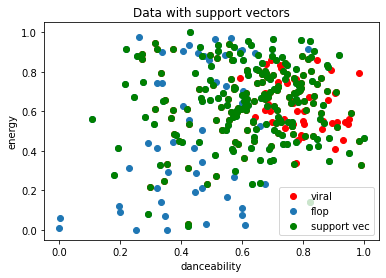

"\nfig, axs = plt.subplots(2, 2)\naxs[0, 0].plot(x, y)\naxs[0, 0].set_title('Axis [0, 0]')\naxs[0, 1].plot(x, y, 'tab:orange')\naxs[0, 1].set_title('Axis [0, 1]')\naxs[1, 0].plot(x, -y, 'tab:green')\naxs[1, 0].set_title('Axis [1, 0]')\naxs[1, 1].plot(x, -y, 'tab:red')\naxs[1, 1].set_title('Axis [1, 1]')\n"

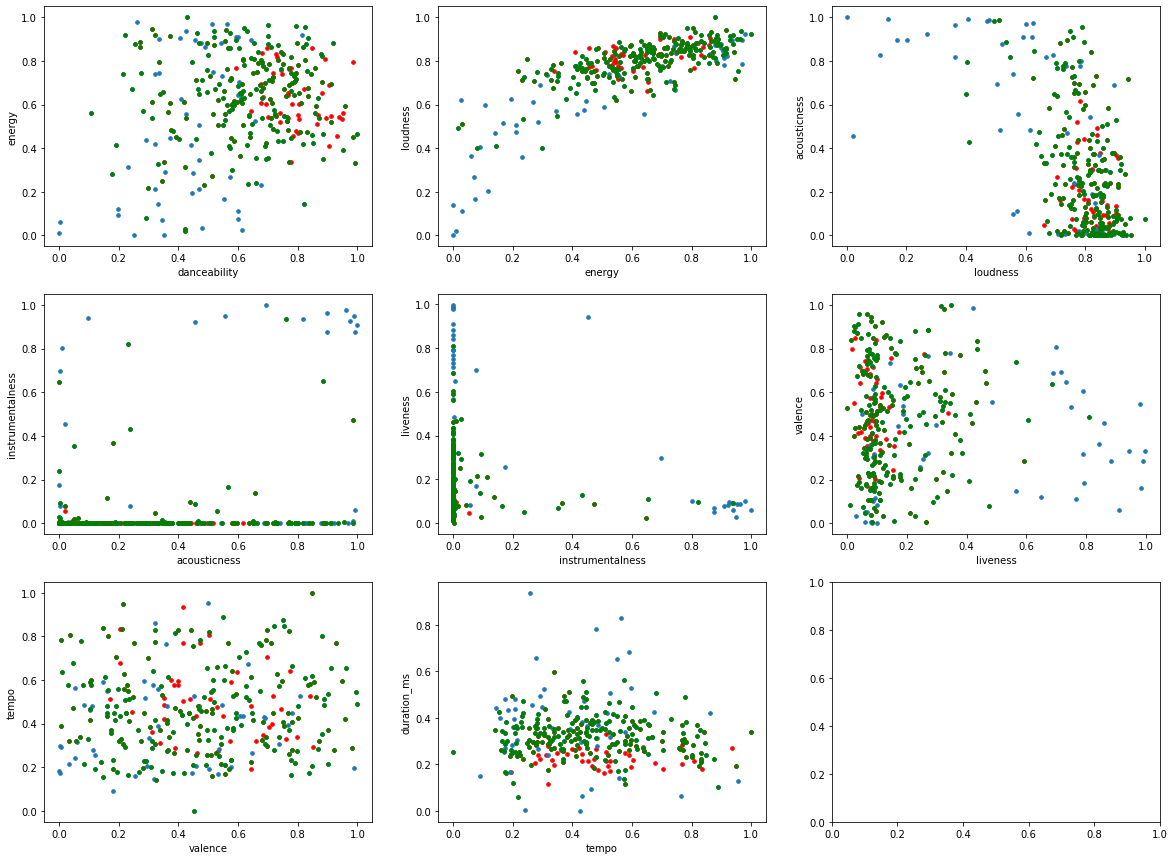

In [50]:
# visualization using the unPCAed result
support_vectors = support_vec.support_vectors_

# Visualize support vectors
data = X.to_numpy()

axis_1_name = X.columns[0]
axis_2_name = X.columns[1]

axis_1 = data[:,0]
axis_2 = data[:,1]

viral_data_1 = axis_1[(tag==1).to_numpy()]
viral_data_2 = axis_2[(tag==1).to_numpy()]
flop_data_1 = axis_1[(tag==0).to_numpy()]
flop_data_2 = axis_2[(tag==0).to_numpy()]

plt.scatter(viral_data_1, viral_data_2, color = 'red', label='viral')
plt.scatter(flop_data_1, flop_data_2, label='flop')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='green', label='support vec')

plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Data with support vectors')
plt.legend()
plt.show()

num_graph = len(X.columns)
fig, axs = plt.subplots(3, 3, figsize=(20,15))
for i in range(num_graph-1):
    axis_1_name = X.columns[i]
    axis_2_name = X.columns[i+1]
    axis_1 = data[:,i]
    axis_2 = data[:,i+1]
    viral_data_1 = axis_1[(tag==1).to_numpy()]
    viral_data_2 = axis_2[(tag==1).to_numpy()]
    flop_data_1 = axis_1[(tag==0).to_numpy()]
    flop_data_2 = axis_2[(tag==0).to_numpy()]
    axs[int(i/3), i%3].scatter(viral_data_1, viral_data_2, color = 'red', label='viral', s = 13)
    axs[int(i/3), i%3].scatter(flop_data_1, flop_data_2, label='flop', s = 13)
    axs[int(i/3), i%3].scatter(support_vectors[:,i], support_vectors[:,i+1], color='green', label='support vec', s = 13)

    ax = axs.flat[i]
    ax.set(xlabel=axis_1_name, ylabel=axis_2_name)
    
    
'''
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')
'''
